In [ ]:
# !pip -q install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,roc_auc_score,make_scorer, f1_score,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import scipy.stats as stats
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train=pd.read_csv('Train_Data(1).csv')
df_test=pd.read_csv('Test_Data(1).csv')

  - **SEQN**: Sequence number (identifier)
  - **RIDAGEYR**: Age in years i.e., Respondent's Age Group
  - **RIAGENDR**: Respondent's
  - **Gender** (1=Male, 2=Female)
  - **PAQ605**: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week
  - **BMXBMI**: Body Mass Index
  - **LBXGLU**: Glucose level
  - **DIQ010**: Diabetes questionnaire response
  - **LBXGLT**: Glucose tolerance (Oral)
  - **LBXIN**: Insulin level

In [ ]:
df_train.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
df_test.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


Requires scaling if not using tree based models

In [ ]:
x=df_train.drop(['age_group'],axis=1)
y=df_train['age_group']

In [ ]:
x.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9


In [ ]:
y.isnull().sum()

np.int64(14)

In [ ]:
y=y.map({'Adult':0,'Senior':1}).fillna(-1).astype(int)

In [ ]:
y.value_counts()

,count
age_group,
0,1638
1,314
-1,14


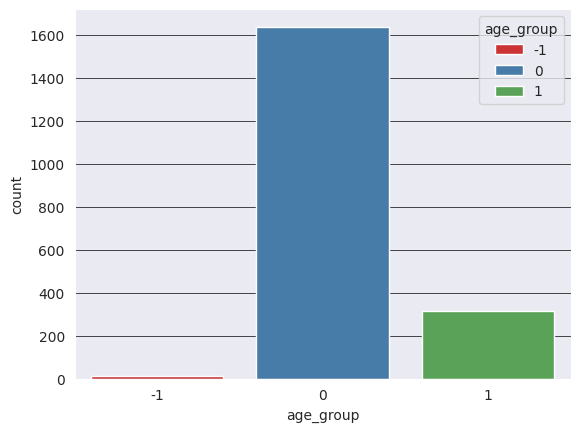

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=y,hue=y,palette='Set1')
plt.grid(color='black', linewidth=0.5,axis='y')

Class imbalance is visible

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
y_train.isnull().sum(),y_test.isnull().sum()

(np.int64(0), np.int64(0))

In [ ]:
y_train=y_train.replace(-1,np.nan)
y_test=y_test.replace(-1,np.nan)
y_train.isnull().sum(),y_test.isnull().sum()

(np.int64(11), np.int64(3))

In [ ]:
df2=pd.concat([X_train,y_train],axis=1)

In [ ]:
imputer_x_train=KNNImputer(n_neighbors=3,weights='distance')
imputer_x_train.fit(X_train)

KNNImputer(n_neighbors=3, weights='distance')

In [ ]:
imputer=KNNImputer(n_neighbors=3,weights='distance')
df2=imputer.fit_transform(df2)
df2=pd.DataFrame(df2,columns=df_train.columns)

In [ ]:
# y=imputer.fit_transform(y.values.reshape(-1,1)).round(2).astype(int)
# y=pd.DataFrame(y,columns=['age_group'])
X_train=df2.drop(['age_group'],axis=1)
y_train=df2['age_group']
y_train=y_train.astype(int)
y_train.value_counts()

,count
age_group,
0,1321
1,251


In [ ]:
smote=SMOTE(random_state=42,sampling_strategy='minority')
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

# X_train_sm, y_train_sm = SMOTETomek().fit_resample(X_train, y_train)
y_train_sm.value_counts()

,count
age_group,
0,1321
1,1321


In [ ]:
df3=pd.concat([X_test,y_test],axis=1)

In [ ]:
df3=imputer.transform(df3)
df3=pd.DataFrame(df3,columns=df_train.columns)

In [ ]:
X_test=df3.drop(['age_group'],axis=1)
y_test=df3['age_group']
y_test=y_test.astype(int)

In [ ]:
lgbm = LGBMClassifier(
    # tree_method='hist',
    # eval_metric='logloss',
    verbose=-1,
    learning_rate= 0.1,
    max_depth= -1,
    class_weight='balanced',
    # n_estimators= 300,
    # num_leaves= 63
)

lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy:  0.7538071065989848

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       331
           1       0.26      0.29      0.27        63

    accuracy                           0.75       394
   macro avg       0.56      0.56      0.56       394
weighted avg       0.76      0.75      0.76       394



In [ ]:
X_2class_pca = PCA(n_components=2).fit_transform(X_train_sm)
scaler=StandardScaler()
X_2class_pca=scaler.fit_transform(X_2class_pca)

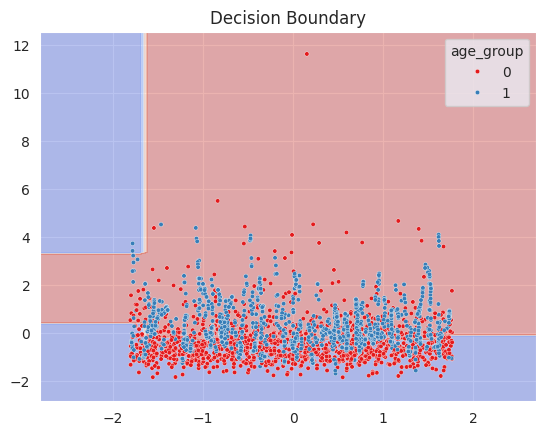

In [ ]:
model = LGBMClassifier(
    tree_method='hist',
    eval_metric='logloss',
    verbose=-1,
    learning_rate= 0.01,
    max_depth= 2,
    class_weight='balanced',
    n_estimators= 300
)

model.fit(X_2class_pca, y_train_sm)

h = 0.1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0],s=10, y=X_2class_pca[:, 1], hue=y_train_sm, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary")
plt.show()

In [ ]:
df_test=imputer_x_train.transform(df_test)
df_test=pd.DataFrame(df_test,columns=df_train.drop(['age_group'],axis=1).columns)

In [ ]:
y_pred_test=lgbm.predict(df_test)

In [ ]:
submission_df = pd.DataFrame(y_pred_test, columns=['age_group'])
submission_df.to_csv('mod_lgbm_with_smote.csv', index=False)

In [ ]:
df2=pd.read_csv('mod_lgbm_with_smote.csv')
df2.head()

,age_group
0,0
1,1
2,1
3,0
4,0
